# Time Series Analysis Project : Forecast Post-Sale Customer Service Calls
Author : Sofia BOUMAHRAT & Gabriel TRUONG

Date : 23/10/2022


## Summary

&#9639; [Introduction](#intro)

&#9639; [Data cleaning](#clean)

&#9639; [Band procedure : identifying the model type](#band)

&#9639; [Detecting, and first extraction of the trend component](#pre_trend)

&#9639; [Detecting, extracting and forecasting the seasonal component](#season)

&#9639; [Second extraction and forecastinf the trend component](#true_trend)

&#9639; [Forecasting the residual component](#residual)

&#9639; [Conclusion](#residual)

## `Introduction`

<a id='intro'></a>

## `Data Cleaning`

<a id='clean'></a>

In [1]:
#import the needed libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
#import the dataset
file="../Service Clients Darty 2017-2021.xlsx"
df = pd.read_excel(file)

#delete the useless columns for this study
df=df.drop(columns=["Appels EGP"])

#set the date as index
df.set_index('Date',inplace=True)

#from the 1/10/21 the column "appels" is empty, drop these values
df.dropna(inplace=True)

#check the type of the columns "appels"
df.dtypes

Appels    float64
dtype: object

In [4]:
df.head(),df.tail()

(            Appels
 Date              
 2017-01-01     0.0
 2017-01-02  5774.0
 2017-01-03  5744.0
 2017-01-04  5833.0
 2017-01-05  5588.0,
             Appels
 Date              
 2021-09-26   711.0
 2021-09-27  5860.0
 2021-09-28  5160.0
 2021-09-29  5217.0
 2021-09-30  4963.0)

In [5]:
#Have a first look at the dataset
df.describe() 
#min = 0 because of holy days, shouldn't be a problem if we have an additive model

,Appels
count,1734.000000
mean,5461.132065
std,2635.572188
min,0.000000
25%,4211.750000
50%,5804.500000
75%,6899.750000
max,16049.000000


`Divide the data into training and test sets`

In [6]:
train_df,test_df=train_test_split(df, test_size=0.33,shuffle=False)

`Implementing the Resample function`

In [7]:
def resample_df(df, freq):
    """
    Resample a dataframe to a given frequency
    args: 
    - df: dataframe to resample
    - freq: string that gives the frequency ie. 'Y','W','M'
    
    returns: resampled dataframe
    """
    return df.resample(freq).sum()

`Discussion on the periodicity choice for the data`

 ## `Band procedure : identifying the model type`
 <a id='band'></a>

 This step will be done in Excel, so after resampling we export the data to Excel to perform the Band procedure & the Buys Ballot Table.


In [9]:
df.head()

,Appels
Date,
2017-01-01,0.0
2017-01-02,5774.0
2017-01-03,5744.0
2017-01-04,5833.0
2017-01-05,5588.0


Text(0.5, 1.0, 'Daily data')

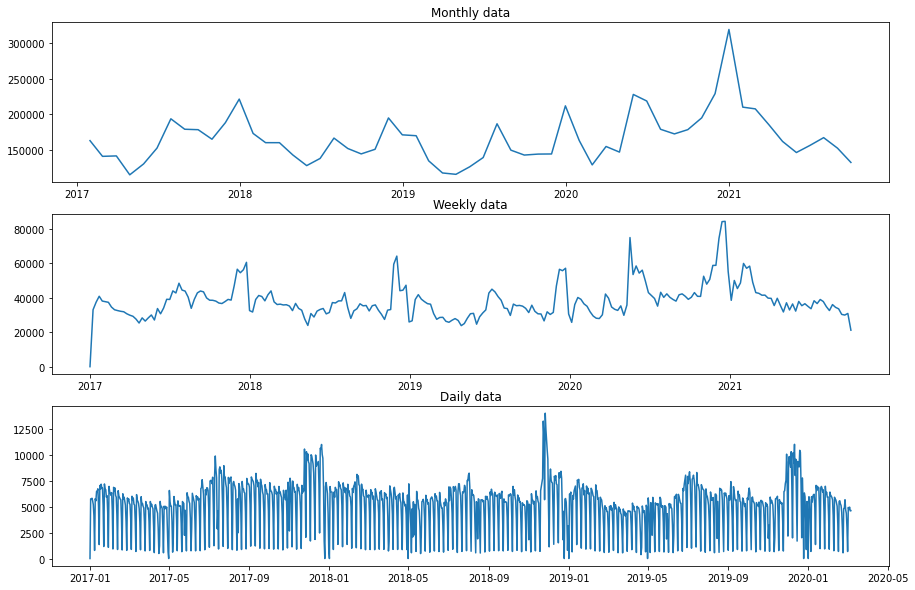

In [8]:
#First let's resample the data to better visualize the bands direction
df_monthly=resample_df(df,'M')
df_weekly=resample_df(df,'W')

#plot the data
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,10))
ax1.plot(df_monthly.index,df_monthly['Appels'])
ax1.set_title('Monthly data')
ax2.plot(df_weekly.index,df_weekly['Appels'])
ax2.set_title('Weekly data')
ax3.plot(train_df.index,train_df['Appels'])
ax3.set_title('Daily data')


Thanks to graphs, we can assume that the model is *additive* (curves with local extremum are parrallel).

 ## `Buys-Ballot Table procedure : identifying the model type`
 <a id='additivity'></a>

In [46]:

file="Service Clients Darty 2017-2021.xlsx"
test=pd.read_excel(file)
filtered_df = test.loc[(test['Date'] >= '2020-09-01') & (test['Date'] < '2020-09-15')]


,Appels
Date,
2020-01-05,25761.0
2020-01-12,36102.0
2020-01-19,40215.0
2020-01-26,39163.0
2020-02-02,36522.0


In [53]:
def filter_df(years,df):
    """
    Filter the dataframe to keep only the data from 2020
    """
    for year in years:
        df$year$=[df.index.year == year]

In [54]:
test = filter_df(2020,df_weekly)
test.head()

,Appels
Date,
2020-01-05,25761.0
2020-01-12,36102.0
2020-01-19,40215.0
2020-01-26,39163.0
2020-02-02,36522.0


In [59]:
a="caca"
print(f'df$a$')

df$a$
